# Measuring the Speed of Light

In the late 1800s, Simon Newcomb performed a series of measurements of the speed of light. In this notebook, you will take his raw data and perform some simple analysis and visualization of this data using Pandas.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Raw data

Newcomb measured how long it took (in nanoseconds) for light to travel $7442$ meters. His raw measurements are reported as deviations from $24,800$ nanoseconds. Here is a file with the raw data. This comes from Stigler (1977).

In [2]:
offset = 24800 # add this to raw data to get times in nanoseconds
distance = 7442 # distance in meters traveled

In [3]:
%%writefile speed_of_light.txt
28 26 33 24 34 -44 27 16 40 -2
29 22 24 21 25 30 23 29 31 19
24 20 36 32 36 28 25 21 28 29
37 25 28 26 30 32 36 26 30 22
36 23 27 27 28 27 31 27 26 33
26 32 32 24 39 28 24 25 32 25
29 27 28 29 16 23

Overwriting speed_of_light.txt


## Reading the data

Read the raw data in as a Pandas `DataFrame`:

* Create a column named `raw` with integer valued deviations.
* Name the `DataFrame` `data`.

In [4]:
# YOUR CODE HERE
f = open('speed_of_light.txt', 'r')
raw = "".join((" ".join(f)).split("\n")).split(" ")
data = pd.DataFrame({'raw': raw}, dtype=int)
# data

In [5]:
data.head()

,raw
0,28
1,26
2,33
3,24
4,34


In [6]:
assert list(data.columns)==['raw']
assert len(data)==66
assert data.raw.dtype==np.dtype(int)

## Transforming the data

Create two new columns in the `DataFrame`:

* A column named `time` that has the times in nanoseconds.
* A column named `speed` that has the speeds in meters/nanosecond.

In [7]:
# YOUR CODE HERE
data['time']  = data['raw'] + offset
data['speed']  = distance/data['time']

In [8]:
data.head()

,raw,time,speed
0,28,24828,0.299742
1,26,24826,0.299766
2,33,24833,0.299682
3,24,24824,0.299791
4,34,24834,0.299670


In [9]:
assert list(data.columns)==['raw', 'time', 'speed']
assert abs(data.time.mean()-24826.0)<1.0
assert abs(data.speed.mean()-0.3)<0.1
assert data.time.dtype==np.dtype(int)
assert data.speed.dtype==np.dtype(float)

## Visualization and outlier removal

Make an appropriately labeled (with units) `distplot` of the `time` data.

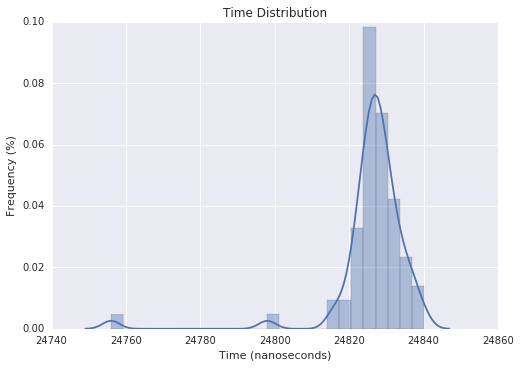

In [10]:
# YOUR CODE HERE
sns.distplot(data['time'])
plt.xlabel('Time (nanoseconds)')
plt.ylabel('Frequency (%)')
plt.title('Time Distribution')

Make an appropriately labeled (with units) of the speed data:

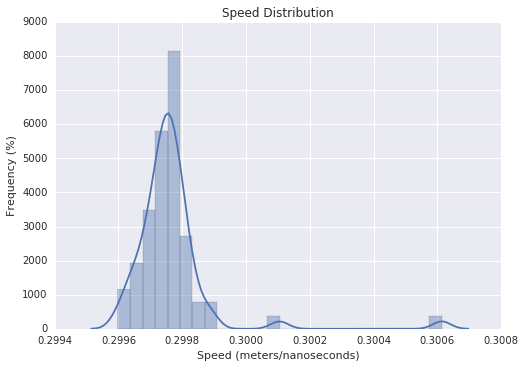

In [11]:
# YOUR CODE HERE
sns.distplot(data['speed'])
plt.xlabel('Speed (meters/nanoseconds)')
plt.ylabel('Frequency (%)')
plt.title('Speed Distribution')

Create a new `DataFrame` named `data2` that has the outliers removed:

In [12]:
# YOUR CODE HERE
data2 = data
data2 = data2[data2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
# data2 = data2[data2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 0.25)]

# data2 = data2[data2.apply(lambda x: data2.std() < 0.25).all(axis=1)]

# data2 = data.apply(np.sqrt)

# data2['time']  = data2['raw'] + offset
# data2['speed']  = distance/data2['time']
# data3 = data + data2
data2

,raw,time,speed
0,28,24828,0.299742
1,26,24826,0.299766
2,33,24833,0.299682
3,24,24824,0.299791
4,34,24834,0.299670
6,27,24827,0.299754
7,16,24816,0.299887
8,40,24840,0.299597
10,29,24829,0.299730
11,22,24822,0.299815


Make an appropriately labeled (with units) of the speed data with outliers removed:

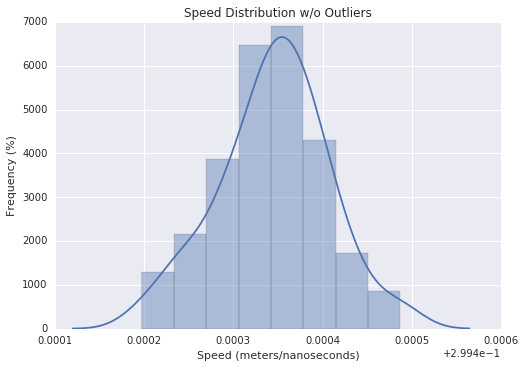

In [13]:
# YOUR CODE HERE
sns.distplot(data2['speed'])
plt.xlabel('Speed (meters/nanoseconds)')
plt.ylabel('Frequency (%)')
plt.title('Speed Distribution w/o Outliers')

## Bootstrapped mean

Here is the actual speed of light in meters/nanoseconds:

In [14]:
actual = 299792458.0*1e-9

Compute the (`n=400`) bootstrapped distribution of the mean speed of light as a NumPy array named `means`. Use the `sample` method of the Pandas `Series/DataFrame` object to do this.

In [15]:
data2.sample(n=len(data2), replace=True)

,raw,time,speed
3,24,24824,0.299791
65,23,24823,0.299803
8,40,24840,0.299597
1,26,24826,0.299766
65,23,24823,0.299803
46,31,24831,0.299706
1,26,24826,0.299766
62,28,24828,0.299742
53,24,24824,0.299791
46,31,24831,0.299706


In [16]:
# YOUR CODE HERE
# means = data2.sample(400)
n = 400
means = np.zeros(n)
for i in range(n):
#     means[i] = pd.DataFrame.sample(data2['speed'])
    means[i] = data2.sample(n=len(data2), replace=True)['speed'].mean()
means


array([ 0.2997479 ,  0.29975695,  0.29973866,  0.29973281,  0.29974054,
        0.2997379 ,  0.29974054,  0.29974017,  0.29973224,  0.29975431,
        0.2997513 ,  0.29974695,  0.29973488,  0.29972413,  0.29974054,
        0.29975639,  0.29974205,  0.29974375,  0.29973639,  0.29973658,
        0.29974431,  0.29974865,  0.29973677,  0.29974205,  0.29975979,
        0.29974375,  0.29975186,  0.2997364 ,  0.29974526,  0.29974394,
        0.29973337,  0.29974658,  0.29974959,  0.29976469,  0.29975281,
        0.29974394,  0.29973677,  0.29974771,  0.29975714,  0.29974526,
        0.29974375,  0.29974205,  0.29976054,  0.29974205,  0.29974205,
        0.29974997,  0.29974488,  0.29974997,  0.29974413,  0.29974129,
        0.29974582,  0.29974017,  0.29973432,  0.29973828,  0.2997247 ,
        0.29974224,  0.29973186,  0.29974808,  0.29974469,  0.29973375,
        0.29975337,  0.2997545 ,  0.29974469,  0.29975375,  0.29974168,
        0.29975073,  0.29974167,  0.2997545 ,  0.29976035,  0.29

Make an appropriately labeled `distplot` of the mean distribution that includes a vertical line where the actual speed of light is. Print the mean and 95% confidence interval of this distribution. Does this experiment agree with the actual speed of light?

Mean: 0.299745851484
95% confidence interval: [ 0.2997311   0.29976092]


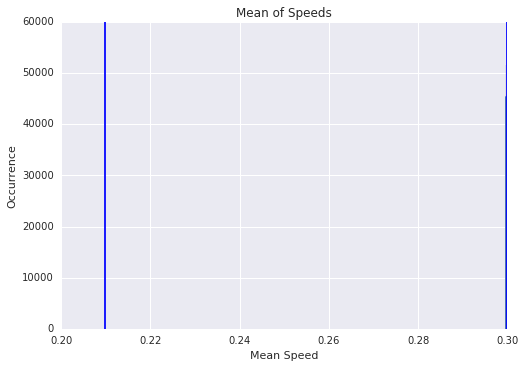

In [28]:
# YOUR CODE HERE
sns.distplot(means)
plt.xlabel("Mean Speed")
plt.ylabel("Occurrence")
plt.title("Mean of Speeds")

plt.axvline(actual)

print("Mean:", np.mean(means))
print("95% confidence interval:", np.percentile(means, (2.5,97.5)))